In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
P = np.array([[960,0,960, 0], [0, 960, 540, 0], [0, 0, 1, 0]])
P_prime = np.array([[960, 0, 960, -1], [0, 960, 540, 0], [0, 0, 1, -3]])
C_center = np.array([[960, 540, 0, 1]]).T

In [93]:
def point_corres(P, lmbda, x, camera_center):
    temp = np.dot(np.linalg.pinv(P), x) 
    return temp + np.dot(lmbda, camera_center)  

In [96]:
x_pts = np.linspace(0, 960, 4)
np.random.shuffle(x_pts)
y_pts = np.linspace(0, 540, 4)
np.random.shuffle(y_pts)
z_pts = np.linspace(10, 1000, 4)
np.random.shuffle(z_pts)
X = np.vstack((x_pts, y_pts, z_pts))
print(X)

[[ 640.    0.  960.  320.]
 [   0.  360.  540.  180.]
 [ 670.  340.   10. 1000.]]


In [105]:
X_p = point_corres(P, 1, X, C_center)
X_prime_p = point_corres(P_prime, 0.3, X, C_center)
print(X_p)
print(X_prime_p)

(3, 4)
(3, 4)
(4, 1)
(3, 4)
(3, 4)
(4, 1)
[[ 290.66666667  620.          951.          -39.66666667]
 [ 163.125       349.125       534.9375      -22.3125    ]
 [ 670.          340.           10.         1000.        ]
 [   1.            1.            1.            1.        ]]
[[ 257.59027817  272.28231044  287.9981618   242.17968763]
 [ 144.64436458  153.59715801  162.00072408  136.41243712]
 [  30.85446296   15.60505242    0.99871276   45.82233401]
 [-212.74851235 -107.83164919   -2.70042908 -317.759222  ]]


[[ 290.66666667  620.          951.          -39.66666667]
 [ 163.125       349.125       534.9375      -22.3125    ]
 [ 670.          340.           10.         1000.        ]
 [   1.            1.            1.            1.        ]]


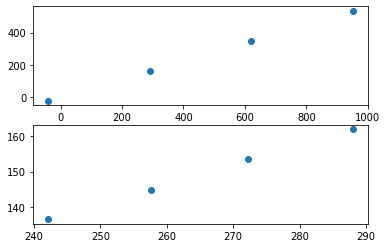

In [106]:
fig, (ax1, ax2) = plt.subplots(2)
print(X_p)
ax1.scatter(X_p[0], X_p[1])
# ax1.set_xlim(0, 960)
# ax1.set_ylim(0, 540)
ax2.scatter(X_prime_p[0], X_prime_p[1])
# ax2.set_xlim(0, 960)
# ax2.set_ylim(0, 540)
plt.show()

In [107]:
# Constructing design matrix
coeffs = []
for i in range(X_p.shape[0]):
    x = X_p[i]
    x_prime = X_prime_p[i]
    coeff = np.array([x_prime[0]*x[0],x_prime[0] * x[1], x_prime[0], x_prime[1] * x[0], x_prime[1]*x[1], x_prime[1] * x[0], x[0], x[1], 1 ])
   
    coeffs.append(coeff)
print(np.array(coeffs))
coeffs = np.array(coeffs)

[[ 7.48729075e+04  1.59705972e+05  2.57590278e+02  7.91433916e+04
   1.68815032e+05  7.91433916e+04  2.90666667e+02  6.20000000e+02
   1.00000000e+00]
 [ 2.35951120e+04  5.04989638e+04  1.44644365e+02  2.50555364e+04
   5.36246078e+04  2.50555364e+04  1.63125000e+02  3.49125000e+02
   1.00000000e+00]
 [ 2.06724902e+04  1.04905174e+04  3.08544630e+01  1.04553851e+04
   5.30571782e+03  1.04553851e+04  6.70000000e+02  3.40000000e+02
   1.00000000e+00]
 [-2.12748512e+02 -2.12748512e+02 -2.12748512e+02 -1.07831649e+02
  -1.07831649e+02 -1.07831649e+02  1.00000000e+00  1.00000000e+00
   1.00000000e+00]]


In [108]:
U, s, VT = np.linalg.svd(coeffs)
F = VT[-1]
norm = np.linalg.norm(F)
F = VT[-1].reshape(3,3)
# print(F[1,0])
F = F / F[1, 0]
print(F)

[[-2.13923796e-01 -8.36447480e-01 -7.74517072e-01]
 [ 1.00000000e+00  3.86215581e-01  6.86791409e-02]
 [ 1.75763084e-01  3.30890691e-01 -2.31865238e+02]]


In [109]:
K = np.delete(P, -1, axis=1)
E = K.T @ F @ K
print(E)
u, d, Vt = np.linalg.svd(E, full_matrices=True, compute_uv=True)
print(u)
print('Singular values %f, %f, %f'%(d[0]/d[0], d[1]/d[0], d[2]/d[0]))
print(Vt)


[[-1.97152171e+05 -7.70869998e+05 -6.31510081e+05]
 [ 9.21600000e+05  3.55936279e+05  1.12188009e+06]
 [ 3.21416562e+05 -5.70338186e+05 -3.36982653e+02]]
[[-0.52525914 -0.54089357 -0.65691474]
 [ 0.84963446 -0.37614749 -0.36964082]
 [-0.04716049 -0.75229463  0.65713673]]
Singular values 1.000000, 0.502824, 0.000058
[[ 0.5074084   0.42751925  0.74817378]
 [-0.55795356  0.82466433 -0.09282544]
 [ 0.65667689  0.37034581 -0.6569775 ]]


In [101]:
x_hat = np.dot(np.linalg.inv(K), X_p)


ValueError: shapes (3,3) and (4,4) not aligned: 3 (dim 1) != 4 (dim 0)